# 자연어 처리 KoNLPy-Kkma
## 애견카페

### 1. 크롤링 후 전처리
#### 크롤링 한 파일 읽어오기

In [1]:
import sys
import csv

csv.field_size_limit(sys.maxsize)
data = list()

f = open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/naverCafe_dogcafe.csv",'r')
rea = csv.reader(f)
f

<_io.TextIOWrapper name='/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/naverCafe_dogcafe.csv' mode='r' encoding='UTF-8'>

#### 한 단위 별로 묶음 
- 글제목
- 글
- 댓글

In [2]:
for row in rea:
    data.append((row[0],row[1],row[2]))

In [3]:
print(data[0][1])

군산온지 얼마안되서 요기조기 탐방중인데요..
가까운곳 김제에 대형애견카페 다녀왔어요~
넓고 깨끗하고 좋으네요.
수도권 살다와서인지 상대적으로 가격도 저렴한것 같아요..!!
군산이나 근교 애견카페나 애견동반되는곳 괜찮은곳
있음 추천도 부탁드립니다..


#### 한글 제외하고 모두 삭제

In [4]:
import re

texts = list()

for i in range(0,len(data)) :
    for j in range(0,2):
        text = re.compile('[^ 가-힣]+').sub("",data[i][j])
        texts.append(text)
print(texts)

['애견카페 나들이', '군산온지 얼마안되서 요기조기 탐방중인데요가까운곳 김제에 대형애견카페 다녀왔어요넓고 깨끗하고 좋으네요수도권 살다와서인지 상대적으로 가격도 저렴한것 같아요군산이나 근교 애견카페나 애견동반되는곳 괜찮은곳있음 추천도 부탁드립니다', '애견카페', '강아지데리고갈수있는 애견카페어디어디있나요디오니는 가게내부수리로 전화연결이안되네요 실내애견카페가잘없네요', '긴글 처음으로 애견카페라는 곳에 갔다가 ', '우선 글이 좀 길어요처음으로 애견카페에 갔어요산비탈을 넓게 경사지게 해놔서 아이들이 뛰어놀기 너무 좋고 생긴지 얼마 안되서 시설좋은 애견카페를 난생 처음으로 가봤어요정말 강아지들이랑 사람이랑 실내외 가릴거 없이 많더라구요일단 실내에 자리가 없어서 실외 나가니 신나서 뛰어나가나 싶더니 초 안돼서 안아달라고 점프를 하더라구요잠시 안아줬다 내려줬다하며 냄세 맡기도 하고 쫒기기도 하고 그랬어요여기까진 나름 예상한대로 괜찮았어요실내에 자리가 생겨서 들어가서 커피랑 간식 시켜 먹고 놀면서 자리가 문쪽에 가까워서인지 지나가는 강아지 가까이 오면 짖더라구요 아  애견카페 마냥 편치않구나  싶었어요 때마침 꽤 큰 대형견이 두마리가 들어오더라구요원래 안되는데 양해구하고 들어오더라구요정확히 종은 모르겠는데 보더콜리 믹스 같은데 남편말로는 보더콜리보다 훨씬 큰강아지래요아무튼 하도 실내에서 짖고 못노는거 같아서 저희도 밖에 나가게 됐어요대형견이 좀 신경이 쓰였지만  미만 강아지 오는곳에 들여보내준거 보면 매너있고 얌전한 강아지들인줄 알았어요그런데 저희 호두가 딱봐도 만만해 보였을가요호두를 내려놓자 마자 다른강아지들도 호두보다 덩치 작은 친구들도 많았는데갑자기 한마리가 호두를 쫒기 시작하는거예요저는 얼른 호두를 들어올리려고 쫒아가기 시작했는데 호두가 쫒기니까 전속력으로 죽기살기로 뛰어서 도망가서 정말 당황했어요그러다가 호두가 너무 힘든지 낑낑 소리를 내면서 뛰는데 거기있는 사람들이 실내고 밖이고 간에 다 모두 호두랑 그 강아지를 쳐다보고 있었어요더이상 호두가 뛰기 힘든지 

### 2. 자연어 처리 KoNPLy

#### Kkma 설치 

In [5]:
#!pip install konlpy

#### Kkma로 형태소 분석
    - .nouns로 명사 가져옴
    - .pos로 전체 형태소 분석 후, VV인 동사만 가져옴

In [6]:
import konlpy
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()

textNVs =list()

for i in range(0,len(texts)):
    textNoun = kkma.nouns(texts[i])
    textVerb = [x for (x, y) in kkma.pos(texts[i]) if y == 'VV']
    textNVs.append(textNoun)
    textNVs.append(textVerb)

print(textNVs)

[['애견', '애견카페', '카페', '나들이'], [], ['군산', '지', '얼마', '요기', '요기조기', '조기', '중', '탐방', '곳', '김', '대형', '대형애견카페', '애견', '카페', '좋으', '수도권', '인지', '상대적', '가격', '군', '산', '근교', '애견카페', '애견동반', '동반', '곳있음', '있음', '추천', '부탁'], ['오', '되', '스', '다녀오', '넓', '깨끗하', '살', '오', '드리'], ['애견', '애견카페', '카페'], [], ['강아지', '수', '카', '애견', '어디', '카페어디', '페어', '디', '디오', '가게', '가게내부수리', '내부', '수리', '전화', '전화연결', '연결', '실내', '카페'], ['데리', '갈', '있', '있', '니'], ['글', '처음', '애견', '애견카페', '카페', '곳'], ['가'], ['글', '처음', '애견', '애견카페', '카페', '산', '산비탈', '비탈', '아이', '얼마', '서', '시설', '강아지', '이랑', '사람', '실', '실내외', '내외', '거', '실내', '자리', '실외', '신나', '초', '점프', '여기', '나름', '예상', '대로', '커피', '간식', '문', '문쪽', '쪽', '인지', '때', '대형', '대형견', '견', '마리', '양해', '종', '보더', '보더콜리', '콜리', '믹스', '남편', '남편말로', '말로', '강', '지래', '저희', '밖', '신경', '미', '곳', '매너', '얌전', '줄', '두가', '가요', '가요호두', '호두', '덩치', '친구', '한마리', '쫒', '쫒기', '기', '시작', '저', '쫒아가기', '아가', '전속력', '죽기', '당황', '소리', '거기', '간', '모두', '이상', '이빨', '모습', '방향', '방향전환', '전환', '

#### finalTexts =  한 단위 별로 묶인 명사와 동사를 모두 합침

In [7]:
finalTexts=list()
for i in range(0,len(textNVs)):
    for j in range(0,len(textNVs[i])):
        finalTexts.append(textNVs[i][j])
print(finalTexts)

['애견', '애견카페', '카페', '나들이', '군산', '지', '얼마', '요기', '요기조기', '조기', '중', '탐방', '곳', '김', '대형', '대형애견카페', '애견', '카페', '좋으', '수도권', '인지', '상대적', '가격', '군', '산', '근교', '애견카페', '애견동반', '동반', '곳있음', '있음', '추천', '부탁', '오', '되', '스', '다녀오', '넓', '깨끗하', '살', '오', '드리', '애견', '애견카페', '카페', '강아지', '수', '카', '애견', '어디', '카페어디', '페어', '디', '디오', '가게', '가게내부수리', '내부', '수리', '전화', '전화연결', '연결', '실내', '카페', '데리', '갈', '있', '있', '니', '글', '처음', '애견', '애견카페', '카페', '곳', '가', '글', '처음', '애견', '애견카페', '카페', '산', '산비탈', '비탈', '아이', '얼마', '서', '시설', '강아지', '이랑', '사람', '실', '실내외', '내외', '거', '실내', '자리', '실외', '신나', '초', '점프', '여기', '나름', '예상', '대로', '커피', '간식', '문', '문쪽', '쪽', '인지', '때', '대형', '대형견', '견', '마리', '양해', '종', '보더', '보더콜리', '콜리', '믹스', '남편', '남편말로', '말로', '강', '지래', '저희', '밖', '신경', '미', '곳', '매너', '얌전', '줄', '두가', '가요', '가요호두', '호두', '덩치', '친구', '한마리', '쫒', '쫒기', '기', '시작', '저', '쫒아가기', '아가', '전속력', '죽기', '당황', '소리', '거기', '간', '모두', '이상', '이빨', '모습', '방향', '방향전환', '전환', '틈', '제가', '중간', '우리', '안심

#### textDict_raw = 제거 단계를 거치지 않은 각 명사와 동사의 언급 빈도 수 세기

In [8]:
textDict_raw={}

for word in finalTexts:
    if word not in textDict_raw:
        textDict_raw[word]=1
    else:
        textDict_raw[word]+=1
print(textDict_raw)

{'애견': 2017, '애견카페': 1455, '카페': 1957, '나들이': 24, '군산': 3, '지': 32, '얼마': 33, '요기': 7, '요기조기': 1, '조기': 1, '중': 158, '탐방': 3, '곳': 344, '김': 37, '대형': 92, '대형애견카페': 1, '좋으': 8, '수도권': 7, '인지': 9, '상대적': 3, '가격': 26, '군': 34, '산': 49, '근교': 19, '애견동반': 240, '동반': 369, '곳있음': 2, '있음': 30, '추천': 317, '부탁': 60, '오': 374, '되': 594, '스': 79, '다녀오': 273, '넓': 10, '깨끗하': 20, '살': 78, '드리': 121, '강아지': 507, '수': 405, '카': 95, '어디': 80, '카페어디': 1, '페어': 2, '디': 41, '디오': 1, '가게': 31, '가게내부수리': 1, '내부': 33, '수리': 5, '전화': 25, '전화연결': 1, '연결': 10, '실내': 149, '데리': 171, '갈': 286, '있': 1540, '니': 52, '글': 137, '처음': 114, '가': 582, '산비탈': 1, '비탈': 1, '아이': 243, '서': 36, '시설': 41, '이랑': 25, '사람': 112, '실': 31, '실내외': 7, '내외': 12, '거': 186, '자리': 48, '실외': 39, '신나': 91, '초': 16, '점프': 2, '여기': 74, '나름': 18, '예상': 7, '대로': 6, '커피': 93, '간식': 160, '문': 42, '문쪽': 1, '쪽': 90, '때': 161, '대형견': 54, '견': 240, '마리': 43, '양해': 3, '종': 30, '보더': 9, '보더콜리': 6, '콜리': 6, '믹스': 13, '남편': 16, '남편말로': 1, '말로': 4, '강':

#### textDictraw_sorted = 제거 단계를 거치지 않고 높은 언급 빈도 순으로 정렬

In [9]:
textDictraw_sorted = sorted(textDict_raw.items(), key=lambda x:x[1], reverse=True)
print(textDictraw_sorted)

[('애견', 2017), ('카페', 1957), ('하', 1714), ('있', 1540), ('애견카페', 1455), ('되', 594), ('가', 582), ('강아지', 507), ('놀', 434), ('보', 406), ('수', 405), ('오', 374), ('동반', 369), ('곳', 344), ('추천', 317), ('갈', 286), ('시', 282), ('다녀오', 273), ('분', 261), ('아이', 243), ('애견동반', 240), ('견', 240), ('가능', 235), ('운동장', 216), ('집', 213), ('저', 193), ('거', 186), ('사진', 182), ('유치원', 182), ('좋아하', 176), ('호텔', 174), ('데리', 171), ('키우', 171), ('알', 169), ('가보', 163), ('개', 162), ('때', 161), ('간식', 160), ('중', 158), ('안', 158), ('먹', 157), ('주', 157), ('받', 155), ('식당', 153), ('저희', 152), ('실내', 149), ('울산', 149), ('글', 137), ('친구', 137), ('주세', 137), ('나', 134), ('애', 130), ('동물', 129), ('평', 128), ('산책', 126), ('다니', 126), ('부탁드리', 122), ('병원', 122), ('드리', 121), ('나오', 119), ('층', 118), ('오늘', 117), ('무료', 116), ('처음', 114), ('시간', 113), ('사람', 112), ('근처', 111), ('동', 111), ('전', 110), ('찍', 109), ('분양', 107), ('생각', 106), ('링', 105), ('일', 105), ('강', 103), ('사', 103), ('수제', 102), ('울', 102), ('구', 

#### 삭제할 불용어와 상관없는 단어 
- 불용어 출처 : https://www.ranks.nl/stopwords/korean

In [10]:
stop_words = list()

f1 = open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/한국어불용어.csv",'r')
f2 = open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/애견카페_단어.csv","r")
rea1 = csv.reader(f1)
rea2 = csv.reader(f2)
for row in rea1:
    stop_words.append((row[0]))
for row in rea2:
    stop_words.append((row[0]))
print(stop_words)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

#### 검색한 키워드도 삭제해야 함

In [11]:
keywords=['애견', '카페', '애견카페']

#### finalTexts의 단어들에서 다음의 단어들을 삭제하고 언급 수를 세어  textDict에 저장
- 불용어와 상관없는 단어
- "맛"과 "멋"을 제외한 1개짜리 단어
- 검색한 키워드

In [12]:
textDict={}

for word in finalTexts:
    if word not in stop_words:
        if len(word)>1 or word in ["맛", "멋"]:
            if word not in keywords:
                if word not in textDict:
                        textDict[word]=1
                else:
                        textDict[word]+=1
print(textDict)

{'군산': 3, '요기조기': 1, '조기': 1, '탐방': 3, '대형': 92, '대형애견카페': 1, '상대적': 3, '가격': 26, '곳있음': 2, '추천': 317, '깨끗하': 20, '카페어디': 1, '페어': 2, '디오': 1, '가게내부수리': 1, '내부': 33, '수리': 5, '전화연결': 1, '실내': 149, '산비탈': 1, '비탈': 1, '시설': 41, '자리': 48, '실외': 39, '신나': 91, '점프': 2, '커피': 93, '간식': 160, '문쪽': 1, '대형견': 54, '양해': 3, '남편말로': 1, '말로': 4, '지래': 1, '신경': 20, '얌전': 5, '두가': 2, '가요호두': 1, '쫒기': 3, '쫒아가기': 1, '전속력': 1, '죽기': 1, '당황': 5, '이빨': 5, '모습': 31, '방향': 5, '방향전환': 1, '전환': 2, '한숨': 1, '손톱': 1, '발톱': 2, '잔디': 65, '통유리': 3, '요거': 2, '안이': 1, '패딩': 1, '이상한': 1, '세가': 1, '심장': 4, '가슴': 5, '진정': 3, '말씀하시기도': 1, '장면': 1, '주인장': 2, '목격': 1, '주인': 20, '그거': 4, '트라': 4, '트라우마': 4, '우마': 4, '잘못': 5, '겠다': 2, '카밍시그널': 1, '사진': 182, '전날': 3, '산책': 126, '경사지': 1, '뛰어놀': 72, '뛰어나가': 1, '쓰이': 4, '얼르': 1, '들어올리': 2, '낑낑대': 4, '뒤돌': 1, '들어내': 1, '끼어들': 1, '토닥이': 1, '살피': 3, '애견카페오니': 1, '오니': 1, '호수쪽': 1, '근처': 111, '근처쪽': 1, '초등학생': 5, '좋아하': 176, '조르': 5, '대소변': 2, '소변': 1, '수컷': 4, '네발': 2, '서서': 2, '

#### textDict_sorted = 삭제 단계 이후 언급 수 순으로 정렬

In [13]:
textDict_sorted = sorted(textDict.items(), key=lambda x:x[1], reverse=True)
print(textDict_sorted)

[('추천', 317), ('운동장', 216), ('사진', 182), ('좋아하', 176), ('간식', 160), ('실내', 149), ('동물', 129), ('산책', 126), ('무료', 116), ('근처', 111), ('수제', 102), ('야외', 99), ('커피', 93), ('대형', 92), ('신나', 91), ('주말', 91), ('위치', 90), ('수제간식', 88), ('사장님', 82), ('맛', 75), ('뛰어놀', 72), ('소형', 67), ('잔디', 65), ('음료', 63), ('지역', 62), ('주차', 58), ('화질', 56), ('대형견', 54), ('포토', 51), ('자리', 48), ('주변', 48), ('동네', 47), ('소개', 47), ('소형견', 46), ('거리', 44), ('공원', 43), ('시설', 41), ('정보', 41), ('놀이터', 40), ('평일', 40), ('실외', 39), ('주차장', 39), ('테이블', 37), ('친절', 36), ('직원', 36), ('인테리어', 36), ('분리', 36), ('포토존', 36), ('입장료', 35), ('관리', 35), ('테라스', 35), ('내부', 33), ('즐기', 33), ('애견운동장', 33), ('모습', 31), ('바닥', 30), ('처리', 30), ('비용', 29), ('동영상', 29), ('마당', 29), ('가격', 26), ('규칙', 26), ('인조', 26), ('디저트', 26), ('뛰놀', 25), ('인조잔디', 25), ('음식', 25), ('사고', 25), ('수영장', 24), ('서비스', 23), ('화장실', 23), ('중형견', 23), ('어울리', 22), ('무서워하', 22), ('분위기', 22), ('겨울', 22), ('총금액', 22), ('식사', 22), ('적응', 21), ('카페규칙', 

#### word_counts = 정렬된 textDict_sorted에서 언급 빈도 수가 5 이하인 값을 버림 

In [14]:
word_counts={}
for (word, freq) in textDict_sorted:
    if freq > 5 :
        word_counts[word]=freq
    else:
        pass
print(word_counts)

{'추천': 317, '운동장': 216, '사진': 182, '좋아하': 176, '간식': 160, '실내': 149, '동물': 129, '산책': 126, '무료': 116, '근처': 111, '수제': 102, '야외': 99, '커피': 93, '대형': 92, '신나': 91, '주말': 91, '위치': 90, '수제간식': 88, '사장님': 82, '맛': 75, '뛰어놀': 72, '소형': 67, '잔디': 65, '음료': 63, '지역': 62, '주차': 58, '화질': 56, '대형견': 54, '포토': 51, '자리': 48, '주변': 48, '동네': 47, '소개': 47, '소형견': 46, '거리': 44, '공원': 43, '시설': 41, '정보': 41, '놀이터': 40, '평일': 40, '실외': 39, '주차장': 39, '테이블': 37, '친절': 36, '직원': 36, '인테리어': 36, '분리': 36, '포토존': 36, '입장료': 35, '관리': 35, '테라스': 35, '내부': 33, '즐기': 33, '애견운동장': 33, '모습': 31, '바닥': 30, '처리': 30, '비용': 29, '동영상': 29, '마당': 29, '가격': 26, '규칙': 26, '인조': 26, '디저트': 26, '뛰놀': 25, '인조잔디': 25, '음식': 25, '사고': 25, '수영장': 24, '서비스': 23, '화장실': 23, '중형견': 23, '어울리': 22, '무서워하': 22, '분위기': 22, '겨울': 22, '총금액': 22, '식사': 22, '적응': 21, '카페규칙': 21, '인근': 21, '배변': 21, '스트레스': 21, '케어': 21, '맛집': 21, '메뉴': 21, '깨끗하': 20, '신경': 20, '주인': 20, '면적': 20, '안전': 19, '여름': 18, '옥상': 17, '부족': 17, '내역': 17, '입

### 3. 워드클라우드로 분석

#### 워드클리우드 설치

In [15]:
#!pip install wordcloud

#### 5회이상 언급된 유의미한 단어로 워드클라우드를 만들기 위해 DataFrame 생성

In [16]:
import pandas as pd

df_word_counts=pd.DataFrame(columns=['keywords','freq'])

i=1
for k,v in word_counts.items():
        df_word_counts.loc[i]=[k,v]
        i += 1

display(df_word_counts)

,keywords,freq
1,추천,317
2,운동장,216
3,사진,182
4,좋아하,176
5,간식,160
...,...,...
152,영업시간,6
153,예방,6
154,예방접종,6
155,대공원,6


#### 5회 이상 언급된 유의미한 단어로 워드클라우드 생성

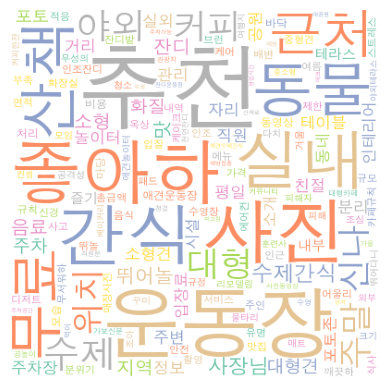

In [17]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

wc=df_word_counts.set_index('keywords').to_dict()["freq"]

wordCloud = WordCloud(
    font_path="AppleGothic", 
    width=400, 
    height=400, 
    max_font_size=100,
    colormap = 'Set2_r',
    background_color="white").generate_from_frequencies(wc)
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')
plt.savefig('/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/wc_애견카페.png',transparent=True)

### 4. 상위 30위 단어 막대그래프 분석

#### 순위 메기기 + 모든 단어 추출을 위한 words -> csv파일로 추출
words의 csv는 첫 한번만 사용하고 이후에 주석 처리

In [18]:
import pandas as pd 
word_index={}
words=pd.DataFrame(columns=["word"])
i=0
for (word, freq) in textDict_sorted:
    if freq > 5 :
        i+=1
        word_index[word] = i
#         words.loc[i]=word
#words.to_csv("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/애견카페_단어.csv")
print(word_index)

{'추천': 1, '운동장': 2, '사진': 3, '좋아하': 4, '간식': 5, '실내': 6, '동물': 7, '산책': 8, '무료': 9, '근처': 10, '수제': 11, '야외': 12, '커피': 13, '대형': 14, '신나': 15, '주말': 16, '위치': 17, '수제간식': 18, '사장님': 19, '맛': 20, '뛰어놀': 21, '소형': 22, '잔디': 23, '음료': 24, '지역': 25, '주차': 26, '화질': 27, '대형견': 28, '포토': 29, '자리': 30, '주변': 31, '동네': 32, '소개': 33, '소형견': 34, '거리': 35, '공원': 36, '시설': 37, '정보': 38, '놀이터': 39, '평일': 40, '실외': 41, '주차장': 42, '테이블': 43, '친절': 44, '직원': 45, '인테리어': 46, '분리': 47, '포토존': 48, '입장료': 49, '관리': 50, '테라스': 51, '내부': 52, '즐기': 53, '애견운동장': 54, '모습': 55, '바닥': 56, '처리': 57, '비용': 58, '동영상': 59, '마당': 60, '가격': 61, '규칙': 62, '인조': 63, '디저트': 64, '뛰놀': 65, '인조잔디': 66, '음식': 67, '사고': 68, '수영장': 69, '서비스': 70, '화장실': 71, '중형견': 72, '어울리': 73, '무서워하': 74, '분위기': 75, '겨울': 76, '총금액': 77, '식사': 78, '적응': 79, '카페규칙': 80, '인근': 81, '배변': 82, '스트레스': 83, '케어': 84, '맛집': 85, '메뉴': 86, '깨끗하': 87, '신경': 88, '주인': 89, '면적': 90, '안전': 91, '여름': 92, '옥상': 93, '부족': 94, '내역': 95, '입질': 96, '매장사진': 97, 

#### 30위 까지의 단어만 추출

In [19]:
top30=textDict_sorted[0:30]
print(top30)

[('추천', 317), ('운동장', 216), ('사진', 182), ('좋아하', 176), ('간식', 160), ('실내', 149), ('동물', 129), ('산책', 126), ('무료', 116), ('근처', 111), ('수제', 102), ('야외', 99), ('커피', 93), ('대형', 92), ('신나', 91), ('주말', 91), ('위치', 90), ('수제간식', 88), ('사장님', 82), ('맛', 75), ('뛰어놀', 72), ('소형', 67), ('잔디', 65), ('음료', 63), ('지역', 62), ('주차', 58), ('화질', 56), ('대형견', 54), ('포토', 51), ('자리', 48)]


#### 30위까지의 단어를 DataFrame으로 전환

In [20]:
import pandas as pd

df_top30=pd.DataFrame(columns=['keywords','freq'])

for i in range(0,30):
    df_top30.loc[i]=[top30[i][0],top30[i][1]]

display(df_top30)

,keywords,freq
0,추천,317
1,운동장,216
2,사진,182
3,좋아하,176
4,간식,160
5,실내,149
6,동물,129
7,산책,126
8,무료,116
9,근처,111


#### 30위까지의 단어로 그린 막대그래프

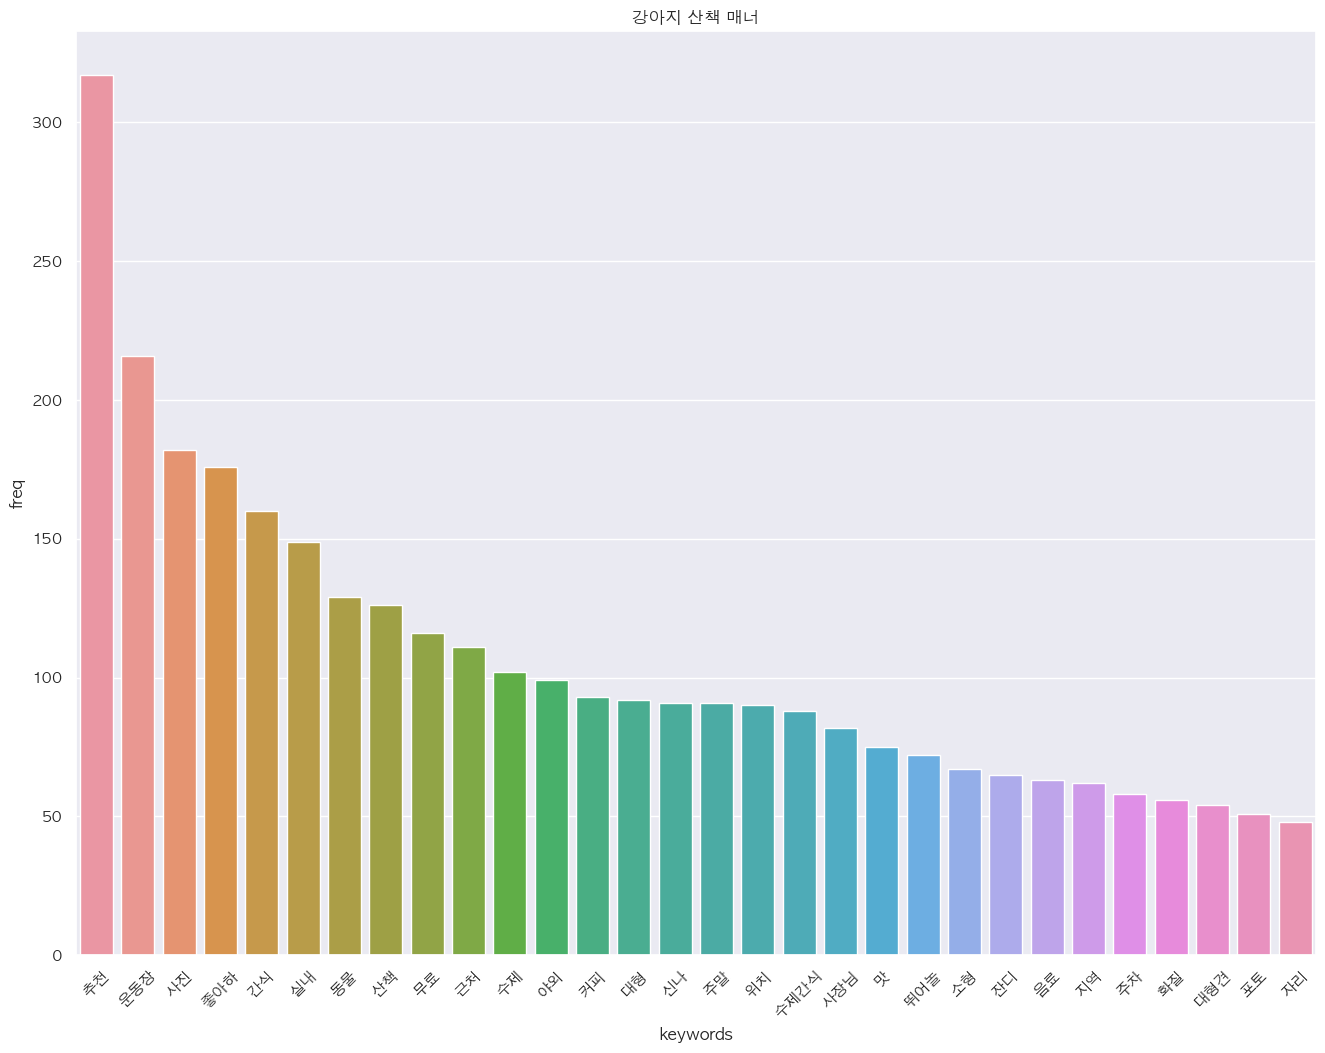

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='darkgrid')

fig = plt.figure(figsize=(16, 12))   
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('강아지 산책 매너')
plt.xticks(rotation=45)
sns.barplot(x='keywords', y='freq', data=df_top30)
#plt.show()
plt.savefig('/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/bar_애견카페.png',transparent=True)

### 5. 연관 카테고리로 퍼센트 구하기

#### 연관 단어 카테고리로 묶기

In [22]:
f3=open("/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/동의어_애견카페.csv","r")
rea3 = csv.reader(f3)
df = pd.DataFrame(rea3)
synonym = df.set_index(0).T.to_dict('list')
print(synonym)

{'시설의 깔끔도': ['관리', '시설', '바닥', '처리', '배변', '케어', '깨끗하', '청소', '청결', '미끄럼', '위생'], '맛있는 커피': ['커피', '커피한잔', '', '', '', '', '', '', '', '', ''], '맛': ['맛', '식사', '맛집', '메뉴', '', '', '', '', '', '', ''], '맛있는 디저트': ['디저트', '음식', '케이크', '브런', '베이커리', '', '', '', '', '', ''], '멋진 사진': ['사진', '화질', '포토', '포토존', '동영상', '촬영', '사진동영상', '', '', '', ''], '동물이 좋아하는 환경': ['좋아하', '동물', '뛰어놀', '신나', '즐기', '뛰놀', '수영장', '뛰어다니', '매트', '조아', '공놀이'], '인테리어': ['인테리어', '모습', '매장사진', '리모델링', '꾸미', '컨셉', '데크', '야외테라스', '테라스', '분리', '울타리'], '공간의 넓이': ['실내', '야외', '실외', '내부', '면적', '옥상', '부족', '규모', '외부', '크기', '대형카페'], '가성비': ['무료', '입장료', '비용', '가격', '총금액', '내역', '', '', '', '', ''], '친절도': ['친절', '직원', '사장님', '서비스', '주인', '무성의', '직원분', '', '', '', ''], '거리': ['근처', '위치', '지역', '동네', '주변', '거리', '인근', '', '', '', ''], '추천': ['추천', '소개', '정보', '유명', '가보신분', '', '', '', '', '', ''], '산책': ['산책', '산책로', '', '', '', '', '', '', '', '', ''], '견종크기': ['대형', '대형견', '소형', '소형견', '중형견', '중소형', '', '', '', '', ''], '주

#### 카테고리 별 언급 빈도 수 계산

In [23]:
temp_word_counts_dict = {}
exist_item_name_arr = []
for category_key, item_name_arr in synonym.items():

    keyword_total_count = 0
    for item_name in item_name_arr:
        if item_name not in '':
            exist_item_name_arr.append(item_name)

        if item_name not in '' and item_name in word_counts:
            keyword_total_count += word_counts[item_name]

    temp_word_counts_dict[category_key] = keyword_total_count


for word, count in word_counts.items():
    if word not in exist_item_name_arr:
        temp_word_counts_dict[word] = word_counts[word]

print(temp_word_counts_dict)

{'시설의 깔끔도': 226, '맛있는 커피': 101, '맛': 139, '맛있는 디저트': 88, '멋진 사진': 374, '동물이 좋아하는 환경': 589, '인테리어': 211, '공간의 넓이': 418, '가성비': 245, '친절도': 213, '거리': 423, '추천': 426, '산책': 132, '견종크기': 289, '주차시설': 109, '먹이': 363, '사고': 102, '규칙': 92, '적응': 86, '커뮤니티': 20, '여행지': 15, '운동장': 255, '잔디': 167, '놀이터': 51, '공원': 49, '수영장': 32, '예방': 12, '주말': 91, '음료': 63, '자리': 48, '평일': 40, '테이블': 37, '화장실': 23, '분위기': 22, '겨울': 22, '신경': 20, '여름': 18, '패드': 15, '에어컨': 15, '훈련사': 8, '가을': 7, '영업시간': 6}


#### 언급 빈도 순으로 정렬

In [24]:
word_freq_sorted = sorted(temp_word_counts_dict.items(), key=lambda x:x[1], reverse=True)
print(word_freq_sorted)

[('동물이 좋아하는 환경', 589), ('추천', 426), ('거리', 423), ('공간의 넓이', 418), ('멋진 사진', 374), ('먹이', 363), ('견종크기', 289), ('운동장', 255), ('가성비', 245), ('시설의 깔끔도', 226), ('친절도', 213), ('인테리어', 211), ('잔디', 167), ('맛', 139), ('산책', 132), ('주차시설', 109), ('사고', 102), ('맛있는 커피', 101), ('규칙', 92), ('주말', 91), ('맛있는 디저트', 88), ('적응', 86), ('음료', 63), ('놀이터', 51), ('공원', 49), ('자리', 48), ('평일', 40), ('테이블', 37), ('수영장', 32), ('화장실', 23), ('분위기', 22), ('겨울', 22), ('커뮤니티', 20), ('신경', 20), ('여름', 18), ('여행지', 15), ('패드', 15), ('에어컨', 15), ('예방', 12), ('훈련사', 8), ('가을', 7), ('영업시간', 6)]


#### 카테고리별 언급 빈도 수 DataFrame 전환

In [25]:
import pandas as pd

df_word_freq_sorted=pd.DataFrame(columns=['keywords','freq'])

for i in range(0,30):
    df_word_freq_sorted.loc[i]=[word_freq_sorted[i][0],word_freq_sorted[i][1]]

df_word_freq_sorted.set_index("keywords",inplace=True)
    
display(df_word_freq_sorted)

,freq
keywords,
동물이 좋아하는 환경,589
추천,426
거리,423
공간의 넓이,418
멋진 사진,374
먹이,363
견종크기,289
운동장,255
가성비,245


#### 카테고리별 언급 빈도수 파이 그래프 분석

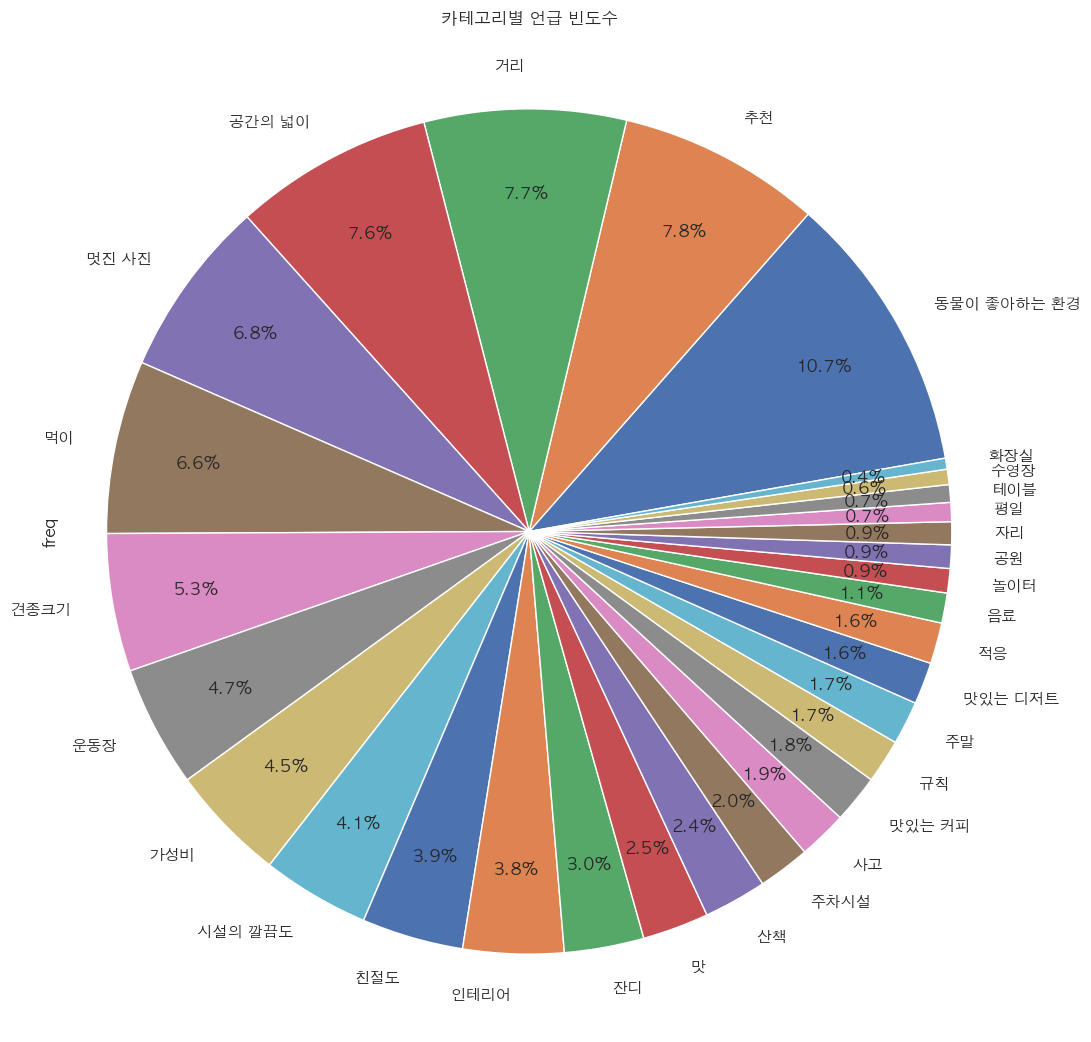

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

df_word_freq_sorted['freq'].plot(kind='pie', 
                     figsize=(12, 13),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     pctdistance=0.8
                     )

plt.title('카테고리별 언급 빈도수', size=12)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
#plt.show()
plt.savefig('/Users/juheekim/Desktop/coding/mycodesource/Multicampus/4jo/mine/NPL/pie_애견카페.png',transparent=True)